Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 03: Analysis of behavioural data

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, May 7, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet we will start to work on a real dataset from an ongoing experiment. In this experiment the participants were asked to freely explore an unknown virtual city, called Seahaven, with an interactive map. After a sufficiently long exploration the participants were tested on three different tasks: 

- the **absolute orientation** of a single house towards the north cardinal direction
- the **relative orientation** between two houses 
- **pointing** from the location of one house to the other

Each task type was performed in two time conditions:

- **3 seconds** for spontaneous decisions
- **infinite** response time for cognitive reasoning

These measurements were repeated up to three times on different days.

We will provide you with more detailed information about this experiment in the tutorial. If you are interested in more than this feel free to have a look at the paper https://www.biorxiv.org/content/10.1101/539080v1.

A small side remark to the dataset: The RTs for the absolute task are exactly the same for both time conditions. This is an error that cannot be corrected on a short notice. Please keep that in mind, when you evaluate your plots.

## Assignment 0: Peer review for sheet 02 [3 pts]

Open an issue in the repository of the groups you have to check. The title of the issue should be your group name (e.g. "Group1). Comment on what was good and what was bad, the aesthetics and ease of reading the plots, what you would have done differently and how many points you would give them for their solutions.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 11, 9 | 5, 1  | 8, 2  | 2, 7 | 10, 6 | 7, 11 | 6, 5  | 4, 3  | 3, 8  | 1, 4   | 9, 10  |

## Assignment 1: Preprocessing [3 pts]

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

### a) Preprocessing the data [1 pt]

First of all you should preprocess the data. This is an important step to avoid running into any problems when you start to analyse the data. Since we provide the Seahaven dataset as an excel file make sure to run ```pip install xlrd``` in your activated acc environment beforehand. This allows you to directly read from excel files.

- Import the data of all three tasks (Absolute, Relative, Pointing) into one dataframe. Since we don't need the whole data, load only the columns "ReactionTime", "AngularDiffBin", "Subject", "Task", "Time", "Answer" and "Measurement".
- Clean the dataframe of all NaNs, i.e. remove all rows where at least one element is missing. How many rows have been removed?
- Change the values of the column "Answer". Replace each value "wrong" with 0 and each value "correct" with 1.

In [2]:
import glob

In [3]:
# to store dataframe
dataframe = []

#Read in the Data from Seahaven and combine it into one dataframe
absolute = pd.read_excel('Seahaven_dataset.xlsx', sheet_name="AbsoluteTask",axes=0)
relative = pd.read_excel('Seahaven_dataset.xlsx', sheet_name="RelativeTask",axes=0)
pointing = pd.read_excel('Seahaven_dataset.xlsx', sheet_name="PointingTask",axes=0)
dataframe= pd.concat([absolute, relative, pointing], ignore_index=True)

# drop all the columns that aren't needed
dataframe=dataframe.drop(['House_Nr','AngularDifference','TargetNr_Correct','TargetNr_Wrong','Target_Nr',
                          'Orientation_Prime','PointingAngle_Wrong','Prime_Nr','PointingAngle_Correct',
                          'OrientationWrongTarget','OrientationCorrectTarget','Distance','Distances', 
                          'Correct_Angle','Wrong_Angle','Correct_Angle','CorrectAnswer','SubjectsDecision', 'Group'], axis=1)

nulls = sum(pd.isnull(dataframe["Answer"]))
print(nulls) # there were 1301 entries with NaN
# remove all the rows that contain null values (if Answer contains NaN then Reaction Time is NaN)
dataframe = dataframe[pd.notnull(dataframe['Answer'])]

#Replaces the values 'wrong' and 'correct' with 0 and 1
dataframe.replace('wrong', 0, inplace=True)
dataframe.replace('correct', 1, inplace=True)

# set options how to display the dataframe
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',8)
pd.set_option('display.width',1000)

# display the dataframe
print(dataframe)

1301
       AngularDiffBin  Answer  Measurement  ReactionTime  Subject      Task      Time
0               150.0       0          1.0      1.664824   1216.0  Absolute      3sec
1                30.0       1          1.0      0.865788   1216.0  Absolute      3sec
2                60.0       0          1.0      1.284187   1216.0  Absolute      3sec
3               180.0       0          1.0      2.081390   1216.0  Absolute      3sec
4               120.0       1          1.0      1.424746   1216.0  Absolute      3sec
5               180.0       1          1.0      1.498336   1216.0  Absolute      3sec
6               150.0       0          1.0      1.213375   1216.0  Absolute      3sec
7                60.0       1          1.0      1.248617   1216.0  Absolute      3sec
8               120.0       1          1.0      0.788024   1216.0  Absolute      3sec
9                90.0       1          1.0      1.573254   1216.0  Absolute      3sec
10               30.0       1          1.0      1

C:\Users\ninag\Anaconda3\envs\acc\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### b) Checking the distribution of the data [2 pts]

Most of the analysis techniques require normally distributed data. To get an idea on how the data looks like use the **preprocessed data** from 1.a) and plot for each task a violinplot that displays the data distribution of the RTs (note that you also have to distinguish between the two time conditions - 3sec and Infinite).

- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) calculate the mean RT per subject.
- Make a violinplot for each combination of task and time condition (you should end up with 6 violinplots). Make sure that the data distributions are displayed clearly and that the y-axes are uniformly scaled to make your plots comparable. You may split up the single plots for a better overview.
- Hint: Play with the keyword inner.
- Using your plots, what can you say about the distribution of the data? It is normally distributed? How is it skewed?

Time      Task    
3sec      Absolute    1.896475
          Pointing    1.788829
          Relative    1.735140
Infinite  Absolute    1.896475
          Pointing    4.902329
          Relative    4.065739
Name: ReactionTime, dtype: float64


'#Eizelne Version für bessere Handhabung\n#create two axes\nfig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10), sharey="row")\nabso= dataframe.query("Task==\'Absolute\'")\nrela = dataframe.query("Task==\'Relative\'")\npoin = dataframe.query("Task==\'Pointing\'")\n\n\ndre = dataframe.query("Time==\'3sec\'")\ninfi = dataframe.query("Time==\'Infinite\'")\n\n\n\nsns.violinplot(data=abso,x=\'Task\',y=\'ReactionTime\',hue=\'Time\', split=True, linewidth = 1, ax = axes[0,0])\nsns.violinplot(data=abso,x=\'Task\',y=\'ReactionTime\', color = \'grey\', linewidth = 1, ax = axes[0,1])\nsns.violinplot(data=dataframe,x=\'Task\',y=\'ReactionTime\', color = \'grey\', linewidth = 1, ax = axes[0,2])\nsns.violinplot(data=dre,x=\'Task\',y=\'ReactionTime\', color = \'grey\', linewidth = 1, ax = axes[1,0])\nsns.violinplot(data=infi,x=\'Task\',y=\'ReactionTime\', color = \'grey\', linewidth = 1, ax = axes[1,1])\nsns.violinplot(data=dataframe,x=\'Task\',y=\'ReactionTime\', color = \'grey\', linewidth = 1

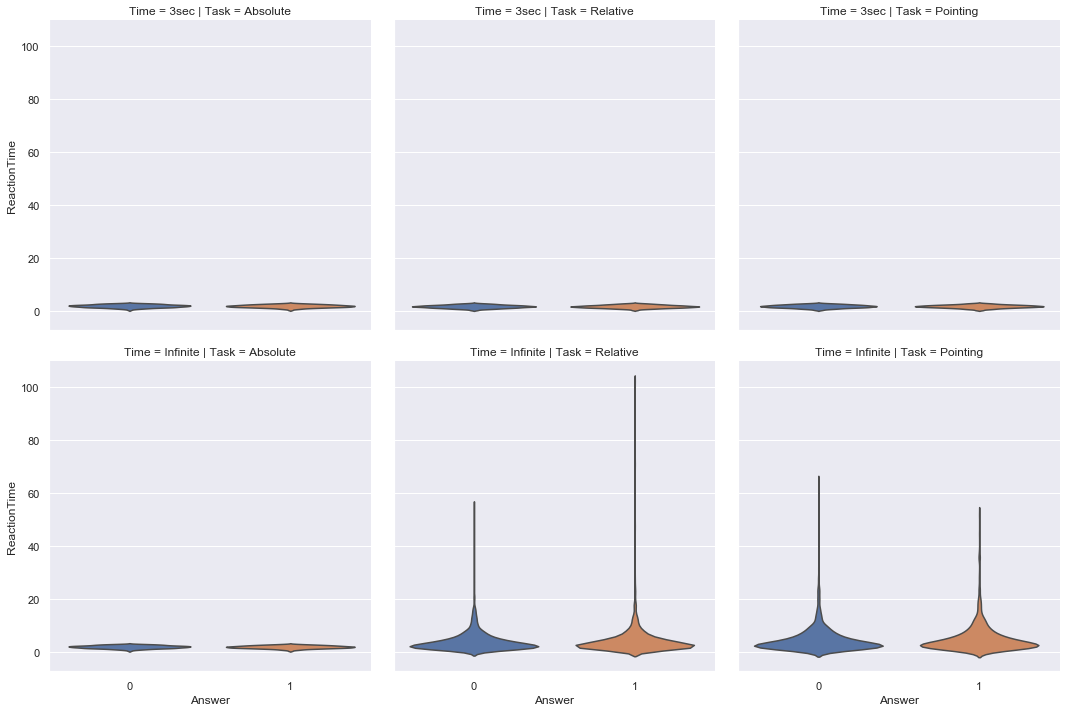

In [4]:
# shows mean response time for each task and time condition

print(dataframe['ReactionTime'].groupby([dataframe['Time'],dataframe['Task']]).mean())

# violinplot for each combination of task and time codition
sns.catplot(data = dataframe, x='Answer', y='ReactionTime', col='Task', row='Time', kind= 'violin', inner =None)


#Diese Plots sind so glaub ich nicht ganz richtig?
"""#Eizelne Version für bessere Handhabung
#create two axes
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10), sharey="row")
abso= dataframe.query("Task=='Absolute'")
rela = dataframe.query("Task=='Relative'")
poin = dataframe.query("Task=='Pointing'")


dre = dataframe.query("Time=='3sec'")
infi = dataframe.query("Time=='Infinite'")



sns.violinplot(data=abso,x='Task',y='ReactionTime',hue='Time', split=True, linewidth = 1, ax = axes[0,0])
sns.violinplot(data=abso,x='Task',y='ReactionTime', color = 'grey', linewidth = 1, ax = axes[0,1])
sns.violinplot(data=dataframe,x='Task',y='ReactionTime', color = 'grey', linewidth = 1, ax = axes[0,2])
sns.violinplot(data=dre,x='Task',y='ReactionTime', color = 'grey', linewidth = 1, ax = axes[1,0])
sns.violinplot(data=infi,x='Task',y='ReactionTime', color = 'grey', linewidth = 1, ax = axes[1,1])
sns.violinplot(data=dataframe,x='Task',y='ReactionTime', color = 'grey', linewidth = 1, ax = axes[1,2])
"""


The data seems to be quite similarly distributed across tasks and conditions, although there are some outlieres in the Relative and Pointing tasks for the infinite condition. This means, that with unlimited time, some subjects took extremely long compared to others to fulfill the task. We cannot really say anything about the distributions since the extreme outliers skew the plots to the bottom of the scale.

You may have noticed that there are (extreme) outliers, that have to be removed from the **preprocessed data**.

- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) look at the RTs and keep only the ones that are within +2 and -2 standard deviation:

$ |(RT_{group1} - mean(RT_{group1}))| \leq (2*std(RT_{group1})) $

$group1$ = e.g. data of absolute task for time condition 3sec

- Make again a violinplot for each combination of task and time condition (you should end up with 6 violinplots). Make sure that the data distributions are displayed clearly and that the y-axes are uniformly scaled to make your plots comparable. You may split up the single plots for a better overview.
- How does the distribution of the data look now? Is it still skewed?

In [5]:
print(dataframe['ReactionTime'].groupby([dataframe['Time'],dataframe['Task']]).mean())

#Get rid of the outliers
tasks = ["Absolute", "Relative", "Pointing"]

tasks_df = []

for task in tasks:
    print(task)
    indeces = []
    current_task = dataframe[dataframe["Task"]==task]      
    current_taska = current_task[current_task['Time']== '3sec']
    current_taskb = current_task[current_task['Time']== 'Infinite']
    print(current_taska.shape)
    print(current_taska)

    indeces = []
#Problem ist glaube ich dass wir die Indeces ignorieren wenn wir das dataframe erstellen aber wir brauchen die hier
    for idx, i in enumerate(current_taska["ReactionTime"]):
        if(abs((i -(current_taska['ReactionTime'].mean())) > (2*current_taska['ReactionTime'].std() ))):
    
            indeces.append(idx)
        
    
    print(indeces)
    current_taska["Idx"].drop(indeces)
    print(current_taska.shape)
    
    for i in current_taskb['ReactionTime']:
        if(abs((i -(current_taskb['ReactionTime'].mean())) > (2*current_taskb['ReactionTime'].std() ))):
       
            print (i)


"""for task in tasks:
    print(task)
    indeces = []
    current_task = dataframe[dataframe["Task"]==task]      
    current_taska = current_task[current_task['Time']== '3sec']
    current_taskb = current_task[current_task['Time']== 'Infinite']



    for i in current_taska['ReactionTime']:
        if(abs((i -(current_taska['ReactionTime'].mean())) > (2*current_taska['ReactionTime'].std() ))):
        
            print (i)
    
    for i in current_taskb['ReactionTime']:
        if(abs((i -(current_taskb['ReactionTime'].mean())) > (2*current_taskb['ReactionTime'].std() ))):
       
            print (i)
"""


"""
tasks = ["Absolute", "Relative", "Pointing"]

tasks_df = []

for task in tasks:
    indeces = []
    current_task = dataframe[dataframe["Task"]==task]
    
    for index, row in current_task.iterrows():
        if abs(row["ReactionTime"] - current_task["ReactionTime"].mean()) > (2* (current_task["ReactionTime"].std())):
            indeces.append(index)
    current_task.drop(indeces)
    tasks_df.append(current_task)

dataframe_wo_outliers = pd.concat(tasks_df)
"""    
                      
#plot with new data
sns.catplot(data = dataframe_wo_outliers, x='Answer', y='ReactionTime', col='Task', row='Time', kind= 'violin',inner = None)
#We can see that the date is more dense now as expected.

Time      Task    
3sec      Absolute    1.896475
          Pointing    1.788829
          Relative    1.735140
Infinite  Absolute    1.896475
          Pointing    4.902329
          Relative    4.065739
Name: ReactionTime, dtype: float64
Absolute
(3231, 7)
      AngularDiffBin  Answer  Measurement  ReactionTime  Subject      Task  Time
0              150.0       0          1.0      1.664824   1216.0  Absolute  3sec
1               30.0       1          1.0      0.865788   1216.0  Absolute  3sec
2               60.0       0          1.0      1.284187   1216.0  Absolute  3sec
3              180.0       0          1.0      2.081390   1216.0  Absolute  3sec
4              120.0       1          1.0      1.424746   1216.0  Absolute  3sec
5              180.0       1          1.0      1.498336   1216.0  Absolute  3sec
6              150.0       0          1.0      1.213375   1216.0  Absolute  3sec
7               60.0       1          1.0      1.248617   1216.0  Absolute  3sec
8           

[195, 634, 963, 1378, 1507, 1839, 2009, 2518, 2598, 2772, 2778, 2869, 3089, 3093, 3168]


KeyError: 'Idx'

**Please make sure that you use the preprocessed data without outliers for the following assignments!**

## Assignment 2: Checking for possible hypotheses [5 pts]

### a) Hypothesis 1 [2 pt]

**Hypothesis 1:** "Given that subjects are limited by time, if they are faster in RT they are also less accurate."

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the mean RT and Accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a scatterplot of the mean RT (x-axis) and the accuracy (y-axis) for the time condition "3sec". 
- Make a second scatterplot and add a simple linear regression line to it. Calculate the slope of the regression line (you are allowed to use scipy). 
- Considering your results, what can you say about the hypothesis?

              ReactionTime  Accuracy
Time Subject                        
3sec 1216.0       1.015738  0.333333
     1217.0       1.673906  0.529412
     1385.0       2.151579  0.411765
     1531.0       0.856836  0.527778
     1533.0       2.265275  0.515152
     1719.0       1.787921  0.562500
     1838.0       1.999012  0.400000
     2007.0       2.060398  0.571429
     2020.0       2.090095  0.542857
     2082.0       1.730828  0.805556
     2096.0       1.404206  0.527778
     2256.0       1.692060  0.428571
     2281.0       1.753649  0.638889
     2294.0       1.814478  0.363636
     2299.0       1.688620  0.722222
     2325.0       2.051637  0.600000
     2557.0       1.952040  0.714286
     2592.0       2.252270  0.575758
     2650.0       1.864348  0.485714
     2739.0       2.140065  0.617647
     2830.0       1.863379  0.441176
     3005.0       1.410930  0.558824
     3030.0       1.764521  0.628571
     3282.0       1.550593  0.805556
     3283.0       1.358051  0.388889
 

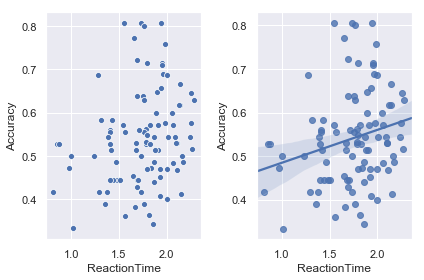

In [8]:
from scipy import stats
import matplotlib.pyplot as plt

# TODO
# use data from relative task
data = dataframe[dataframe["Task"] == "Relative"]

# create new dataframe to average data
data_avg = data[["ReactionTime", "Answer","Time","Subject"]]

#average data grouped by the time conditions
data_avg = data_avg.groupby(["Time","Subject"]).mean()

# rename the answer column to accuracy
data_avg.rename(columns = {"Answer":"Accuracy"}, inplace=True)
#print(data_avg)

#plots nur für da wo 3sec?? 
#ja, weil die hypothese für die infinite data keinen sinn macht

#extract 3sec data for plotting
data_avg_3sec = data_avg.query("Time=='3sec'")
print(data_avg_3sec)

#create subplots to portray scatterplot and regplot next to each other as stated in task
fig, axes = plt.subplots(1, 2)
sns.scatterplot(data=data_avg_3sec,x='ReactionTime',y="Accuracy",ax=axes[0])
sns.regplot(data=data_avg_3sec,x='ReactionTime',y='Accuracy',ax=axes[1])

x = data_avg_3sec["ReactionTime"]
y = data_avg_3sec["Accuracy"]
slope,_,_,_,_ = stats.linregress(x,y)
print("slope:",slope)

# handling legends
fig.tight_layout()


Hypothesis 1: "Given that subjects are limited by time, if they are faster in RT they are also less accurate."

When a linear regression is performed for the averaged data of the 'Relative' task in the 3 second spontaneous decision condition, it can be seen that there is a positive slope. This menas that overall, the subjects with a higher mean RT also have a higher mean Accuracy. This in turn means that those with a lower mean RT also had a lower Accuracy, so those who responded faster were also less accurate. 
This speaks for the validity of the Hypothesis 1.



### b) Hypothesis 2 [1 pt]

**Hypothesis 2:** "Given that subjects have infinite time, they perform better."

- Use the data of all three tasks.
- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the tasks (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance.
- Hint: Play with the keyword dodge.
- Considering your plots, what can you say about the hypothesis?

In [7]:
# use all of the data
data2 = dataframe

# create new dataframe to store averaged data
data2_avg = data2[["Task", "Time", "Answer", "ReactionTime","Subject"]]
#print(data2)
#print(data2_avg)
# average data to get accuracy in Answer column
data2_avg = data2_avg.groupby(["Task","Time","Subject"]).mean()
#print(data2_avg)
# rename Answer to accuracy
data2_avg.rename(columns={"Answer":"Accuracy"}, inplace=True)

print(data2_avg)
# make pointplot
# er kann time und task nicht auslesen 
sns.pointplot(x ="Task", y="Accuracy", hue="Time",data=data2_avg)



                           Accuracy  ReactionTime
Task     Time     Subject                        
Absolute 3sec     1216.0   0.485714      1.341370
                  1217.0   0.742857      1.810178
                  1385.0   0.545455      2.125904
                  1531.0   0.647059      1.610233
                  1533.0   0.545455      2.197194
                  1719.0   0.529412      2.049466
                  1838.0   0.472222      1.910542
                  2007.0   0.588235      2.229546
                  2020.0   0.531250      1.921926
                  2082.0   0.888889      1.807570
                  2096.0   0.542857      1.754983
                  2256.0   0.542857      2.070289
                  2281.0   0.342857      2.361305
                  2294.0   0.571429      1.450455
                  2299.0   0.483871      2.188416
                  2325.0   0.483871      2.324628
                  2557.0   0.531250      2.190501
                  2592.0   0.485714      1.756490


ValueError: Could not interpret input 'Task'

### d) Hypothesis 3 [1 pt]

**Hypothesis 3:** "With each subsequent session subjects get better in performance."

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the mean RT and Accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the measurement (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance.
- Hint: Play with the keyword dodge.
- Make also a pointplot of the measurement (x-axis) and RT (y-axis) for both time conditions (3sec / Infinite).  Make sure that the data is displayed clearly. You may split up the single plots for a better overview.
- Considering your plots, what can you say about the hypothesis?

In [53]:
# use data of relative task
data3 = dataframe[dataframe["Task"] == "Relative"]

# create new dataframe to average data
data3_avg = data[["ReactionTime", "Answer","Time","Subject","Measurement"]]

#average data grouped by the time conditions
data3_avg = data3_avg.groupby(["Time","Subject"]).mean()

# rename the answer column to accuracy
data3_avg.rename(columns = {"Answer":"Accuracy"}, inplace=True)

data3_avg_3sec = data3_avg.query("Time=='3sec'")
data3_avg_Infinite = data3_avg.query("Time=='Infinite'")

'''
Es kann auch hier Time nicht interpretieren, also hab ich es bisher nicht beides in einem plot plotten k
sns.pointplot(x='Measurement',y="Accuracy",hue="Time",data=data3_avg)
'''

#make pointplot for both Time conditions
fig, axes = plt.subplots(1, 2)
sns.pointplot(x ="Measurement", y="Accuracy", data=data3_avg_3sec,ax=axes[0])
axes[0].set_title('3sec')
#set min and max of y axis
axes[0].set_ylim(bottom=0.0,top=1.0)
sns.pointplot(x ="Measurement", y="Accuracy", data=data3_avg_Infinite,ax=axes[1])
axes[1].set_title('Infinite')
#set min and max of y axis
axes[1].set_ylim(bottom=0.0,top=1.0)

fig, axes = plt.subplots(1, 2,sharey=True) #share y because of very different reaction time range
sns.pointplot(x ="Measurement", y="ReactionTime", data=data3_avg_3sec,ax=axes[0])
axes[0].set_title('3sec')
#set min and max of y axis
#Mit min und max von y axis ist in dem plot gar nichts zu sehen
#axes[0].set_ylim(bottom=0.0,top=1.0)
sns.pointplot(x ="Measurement", y="ReactionTime", data=data3_avg_Infinite,ax=axes[1])
axes[1].set_title('Infinite')
#set min and max of y axis
#axes[1].set_ylim(bottom=0.0,top=1.0)


# handling legends
fig.tight_layout()

#print(data3_avg)


ValueError: Could not interpret input 'Time'

### c) Hypothesis 4 [1 pts]

**Hypothesis 4:** "When the angular difference between houses increases subjects are more accurate in the relative task."

- Use the data of the relative task.
- For each angular difference (see "AngularDiffBin") calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the angular differences (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance. Make sure that the angular differences are displayed in ascending order.
- Hint: Play with the keyword dodge.
- Considering your plots, what can you say about the hypothesis?

In [ ]:
# TODO

## Assignment 3: T-test [2 pts]

We will perform a two-sample t-test, i.e. we compare the mean of two groups under the assumption that both are independent and normally distributed with unknown but equal variances. In this case we will look at the data of the relative task and compare the accuracies of the two time conditions (3sec / Infinte). We will ignore that there are different measurement days!

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Check if the data is normally distributed using scipy.stats.normaltest.


- Compute the t-statistics: $ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $

$\bar{x}_1$: mean accuracy of all subjects for time condition "3sec" <br>
$\bar{x}_2$: mean accuracy of all subjects for time condition "Infinite" <br>
$n_1$: sample size for time condition "3sec" <br>
$n_2$: sample size for time condition "Infinite"


- with $ s^2 = \frac{\sum_{i=1}^n{(x_i - \bar{x})^2}}{n-1} $

$x_i$: accuracy of subject i <br>
$\bar{x}$: mean accuracy of all subjects <br>
$n$: sample size


- Calculate the degrees of freedom: $ df = n_1 + n_2 -2 $
- What does the p-value of a t-test tell you in general? Also explain what your calculated p-value tells you specifically (given $\alpha = 0.05$)?

In [ ]:
# TODO
# use data from relative task
data_t = dataframe[dataframe["Task"] == "Relative"]

# create new dataframe to average data
data_t_avg = data[["ReactionTime", "Answer","Time","Subject"]]

#average data grouped by the time conditions
data_t_avg = data_avg.groupby(["Time","Subject"]).mean()

# rename the answer column to accuracy
data_t_avg.rename(columns = {"Answer":"Accuracy"}, inplace=True)

#check for normal distribution
stats.normaltest(data_t_avg)

# gives you the p-value after comparing the t-statistic with the critical t value (computed internally) 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))

# test if your calculation is correct
t2, p2 = stats.ttest_ind(x1,x2)
print("t = " + str(t2))
print("p = " + str(p2))